# Carregando os dados e exibindo.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.use_inf_as_na', True)
from sklearn.preprocessing import LabelEncoder
file_path = '/kaggle/input/dados-de-pacientes-simulados/heart_attack_prediction_dataset.csv'
data = pd.read_csv(file_path)
data.head()

/tmp/ipykernel_157/2352417589.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


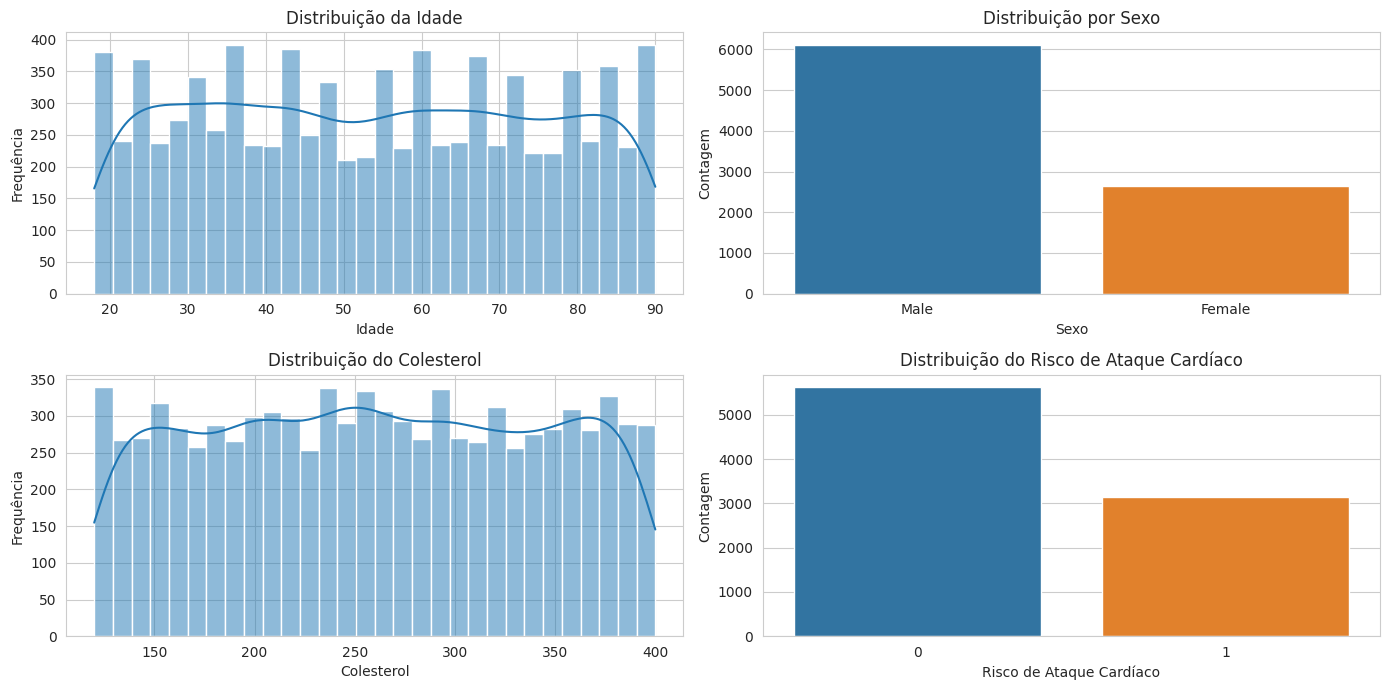

In [3]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

# Histograma da Idade
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Contagem por Sexo
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=data)
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

# Histograma do Colesterol
plt.subplot(2, 2, 3)
sns.histplot(data['Cholesterol'], bins=30, kde=True)
plt.title('Distribuição do Colesterol')
plt.xlabel('Colesterol')
plt.ylabel('Frequência')

# Contagem de Risco de Ataque Cardíaco
plt.subplot(2, 2, 4)
sns.countplot(x='Heart Attack Risk', data=data)
plt.title('Distribuição do Risco de Ataque Cardíaco')
plt.xlabel('Risco de Ataque Cardíaco')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Remover colunas não necessárias para o modelo
data_model = data.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'])

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
data_model['Sex'] = label_encoder.fit_transform(data_model['Sex'])
data_model['Diet'] = label_encoder.fit_transform(data_model['Diet'])

# Separar a coluna de pressão arterial em duas colunas separadas
data_model[['Systolic_BP', 'Diastolic_BP']] = data_model['Blood Pressure'].str.split('/', expand=True).astype(float)

# Remover a coluna original de pressão arterial
data_model = data_model.drop(columns=['Blood Pressure'])

# Converter colunas relevantes para valores numéricos
data_model['Heart Rate'] = pd.to_numeric(data_model['Heart Rate'], errors='coerce')
data_model['Income'] = pd.to_numeric(data_model['Income'], errors='coerce')
data_model['Triglycerides'] = pd.to_numeric(data_model['Triglycerides'], errors='coerce')
data_model['Physical Activity Days Per Week'] = pd.to_numeric(data_model['Physical Activity Days Per Week'], errors='coerce')

# Preencher valores ausentes com a média
data_model = data_model.fillna(data_model.mean())

# Exibir as primeiras linhas do dataframe processado para verificação
data_model.head()


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


In [5]:
from sklearn.model_selection import train_test_split

# Separar variáveis de entrada (X) e saída (y)
X = data_model.drop(columns=['Heart Attack Risk'])
y = data_model['Heart Attack Risk']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os tamanhos dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (7010, 22)
Tamanho do conjunto de teste: (1753, 22)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Treinar um modelo de Random Forest simples
rf_model_simple = RandomForestClassifier(random_state=42)
rf_model_simple.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_simple = rf_model_simple.predict(X_test)

# Avaliar o modelo simples
accuracy_simple = accuracy_score(y_test, y_pred_simple)
report_simple = classification_report(y_test, y_pred_simple)

print("Acurácia do modelo simples:", accuracy_simple)
print("Relatório de Classificação:\n", report_simple)


Acurácia do modelo simples: 0.6411865373645179
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.48      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.56      0.51      0.41      1753
weighted avg       0.59      0.64      0.52      1753



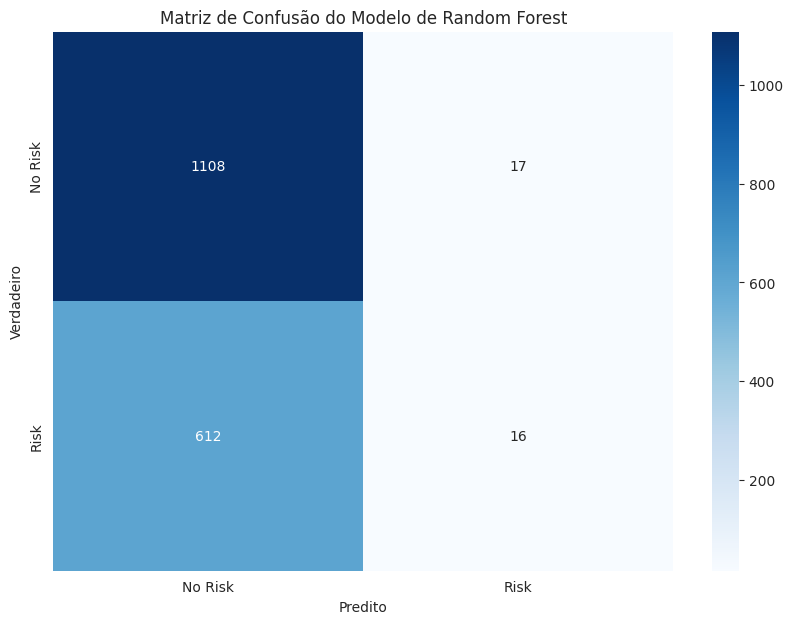

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_simple)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão do Modelo de Random Forest')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de hiperparâmetros, removendo 'auto'
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Criar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar o modelo
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Avaliar o melhor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Avaliar o modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("Acurácia do modelo ajustado:", accuracy_best)
print("Relatório de Classificação:\n", report_best)


Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [ ]:
# Importância das Features
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features no Modelo de Random Forest')
plt.show()